In [1]:
#### import libs
import pandas as pd  
import json

### Read and parse text data

In [3]:
# define dataset name
dataset_file = 'original_dataset.txt'

# Read the dataset 
with open(dataset_file, 'r') as file:
    lines = file.readlines()

# Define column names
columns = ['id', 'book_id', 'title', 'author', 'published_date', 'genre', 'summary']

# Initialize an empty list to store the parsed rows
data = []

# Iterate through each line in the text file
for line in lines:
    # split the line based on the separator (assuming it's tab-separated)
    values = line.strip().split('\t')
    # extract genre values from their dict
    if len(values) >4:
        try:
            values[5] = list(json.loads(values[5]).values())
        except:
            values[5] = ['Unknown Genre']
            
    # create a dictionary for the row values mapped to column names
    row = dict(zip(columns, values))
    
    # append the row dictionary to the data list
    data.append(row)


In [4]:
# Create a DataFrame from the parsed data
df = pd.DataFrame(data)
# Remove rows with 3 or more NaN values
threshold = 3 
df_cleaned = df.dropna(thresh=len(df.columns) - threshold + 1).copy()
# remove first 2 columns
df_cleaned.drop(columns=['id', 'book_id'], inplace=True)
# reset rows index
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned

,title,author,published_date,genre,summary
0,Animal Farm,George Orwell,1945-08-17,"[Roman à clef, Satire, Children's literature, ...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
3,An Enquiry Concerning Human Understanding,David Hume,,[Unknown Genre],The argument of the Enquiry proceeds by a ser...
4,A Fire Upon the Deep,Vernor Vinge,,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...
...,...,...,...,...,...
16551,Under Wildwood,Colin Meloy,2012-09-25,[Unknown Genre],"Prue McKeel, having rescued her brother from ..."
16552,Transfer of Power,Vince Flynn,2000-06-01,"[Thriller, Fiction]",The reader first meets Rapp while he is doing...
16553,Decoded,Jay-Z,2010-11-16,[Autobiography],The book follows very rough chronological ord...
16554,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,[Unknown Genre],Colbert addresses topics including Wall Stree...


### clean data and find missing values 

In [5]:
# clean duplicated rows

df_str = df_cleaned.astype(str) 
duplicated_indexes = df_str[df_str.duplicated()].index
print(duplicated_indexes)

df_cleaned=df_cleaned.drop(16541)
df_cleaned.reset_index(drop=True, inplace=True)

Int64Index([16541], dtype='int64')


In [6]:
rows_with_missing_author = df_cleaned[df_cleaned['author'].eq('')]
rows_with_missing_published_date = df_cleaned[df_cleaned['published_date'].eq('')]
rows_with_missing_genre = df_cleaned[df_cleaned['genre'].apply(lambda x: x == ['Unknown Genre'])]
rows_with_missing_summary = df_cleaned[df_cleaned['summary'].apply(lambda x: len(x)<20)]  
rows_with_missing_title= df_cleaned[df_cleaned['title'].apply(lambda x: len(x)<2)]  

print('Number of rows with missing author value: ', len(rows_with_missing_author))
print('Number of rows with missing published date value: ', len(rows_with_missing_published_date))
print('Number of rows with missing genre value: ', len(rows_with_missing_genre))
print('Number of rows with missing summary value: ', len(rows_with_missing_summary))
print('Number of rows with missing title value: ', len(rows_with_missing_title))

Number of rows with missing author value:  2381
Number of rows with missing published date value:  5608
Number of rows with missing genre value:  3716
Number of rows with missing summary value:  19
Number of rows with missing title value:  4


### Approaches to Handle Missing Values

1. **Use Placeholder**: Replace missing values with placeholders.
   
2. **Split Rows with Missing Values into Different DataFrames**: Split the rows containing missing values into separate DataFrames.


In [7]:
# approch 1 using placeholders

# Replace missing values in 'author' column
df_cleaned.loc[df_cleaned['author'] == '', 'author'] = 'Unknown Author'

# Replace missing values in 'published_date' column
df_cleaned.loc[df_cleaned['published_date'] == '', 'published_date'] = 'Unknown Date'
 
# Replace missing values in 'title' column
df_cleaned.loc[df_cleaned['title'].str.len() < 3, 'title'] = 'Unknown Title'

# Replace missing values in 'summary' column
df_cleaned.loc[df_cleaned['summary'].str.len() < 20, 'summary'] = 'Unknown Summary' 

df_cleaned

,title,author,published_date,genre,summary
0,Animal Farm,George Orwell,1945-08-17,"[Roman à clef, Satire, Children's literature, ...","Old Major, the old boar on the Manor Farm, ca..."
1,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
2,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
3,An Enquiry Concerning Human Understanding,David Hume,Unknown Date,[Unknown Genre],The argument of the Enquiry proceeds by a ser...
4,A Fire Upon the Deep,Vernor Vinge,Unknown Date,"[Hard science fiction, Science Fiction, Specul...",The novel posits that space around the Milky ...
...,...,...,...,...,...
16550,Under Wildwood,Colin Meloy,2012-09-25,[Unknown Genre],"Prue McKeel, having rescued her brother from ..."
16551,Transfer of Power,Vince Flynn,2000-06-01,"[Thriller, Fiction]",The reader first meets Rapp while he is doing...
16552,Decoded,Jay-Z,2010-11-16,[Autobiography],The book follows very rough chronological ord...
16553,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,[Unknown Genre],Colbert addresses topics including Wall Stree...


### Run EDA solutions

- pie charts (Missing Values vs Non-Missing Values)

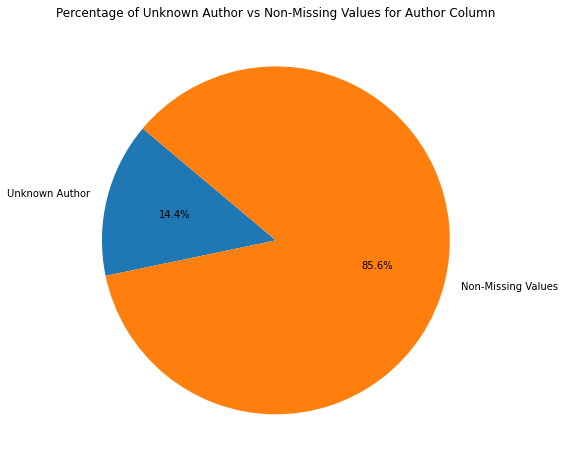

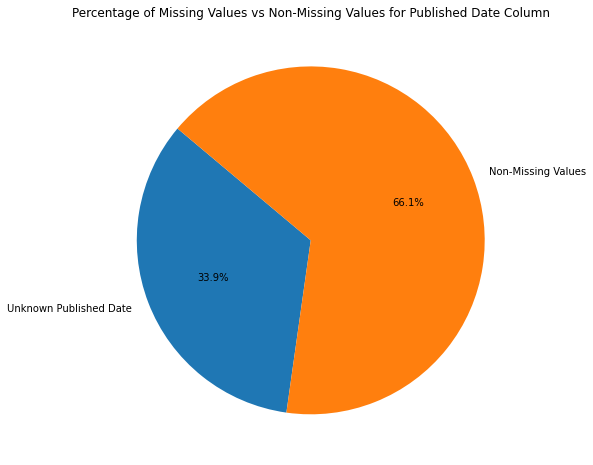

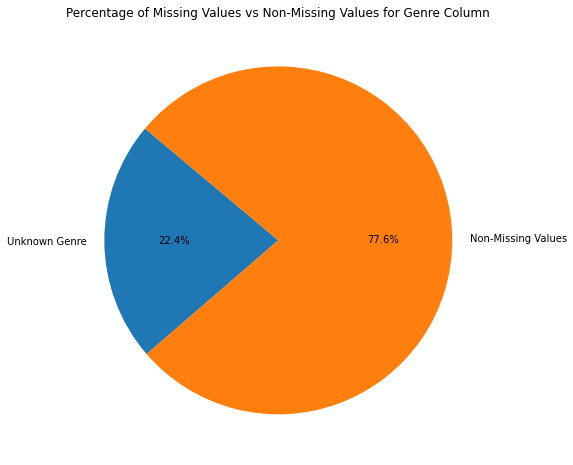

In [8]:
import matplotlib.pyplot as plt

# Calculate the count of missing values and non-missing values for each column
author_missing_count = df_cleaned['author'].value_counts().get('Unknown Author', 0)
author_non_missing_count = len(df_cleaned) - author_missing_count

published_date_missing_count = df_cleaned['published_date'].value_counts().get('Unknown Date', 0)
published_date_non_missing_count = len(df_cleaned) - published_date_missing_count

genre_missing_count = len(rows_with_missing_genre)
genre_non_missing_count = len(df_cleaned) - genre_missing_count

# Create pie charts

# Pie chart for 'author'
author_counts = [author_missing_count, author_non_missing_count]
plt.figure(figsize=(10, 8))
plt.pie(author_counts, labels=['Unknown Author', 'Non-Missing Values'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Unknown Author vs Non-Missing Values for Author Column')
plt.show()

# Pie chart for 'published_date'
published_date_counts = [published_date_missing_count, published_date_non_missing_count]
plt.figure(figsize=(10, 8))
plt.pie(published_date_counts, labels=['Unknown Published Date', 'Non-Missing Values'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Missing Values vs Non-Missing Values for Published Date Column')
plt.show()

# Pie chart for 'genre'
genre_counts = [genre_missing_count, genre_non_missing_count]
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=['Unknown Genre', 'Non-Missing Values'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Missing Values vs Non-Missing Values for Genre Column')
plt.show()


- bar chart (distribution of the genres)

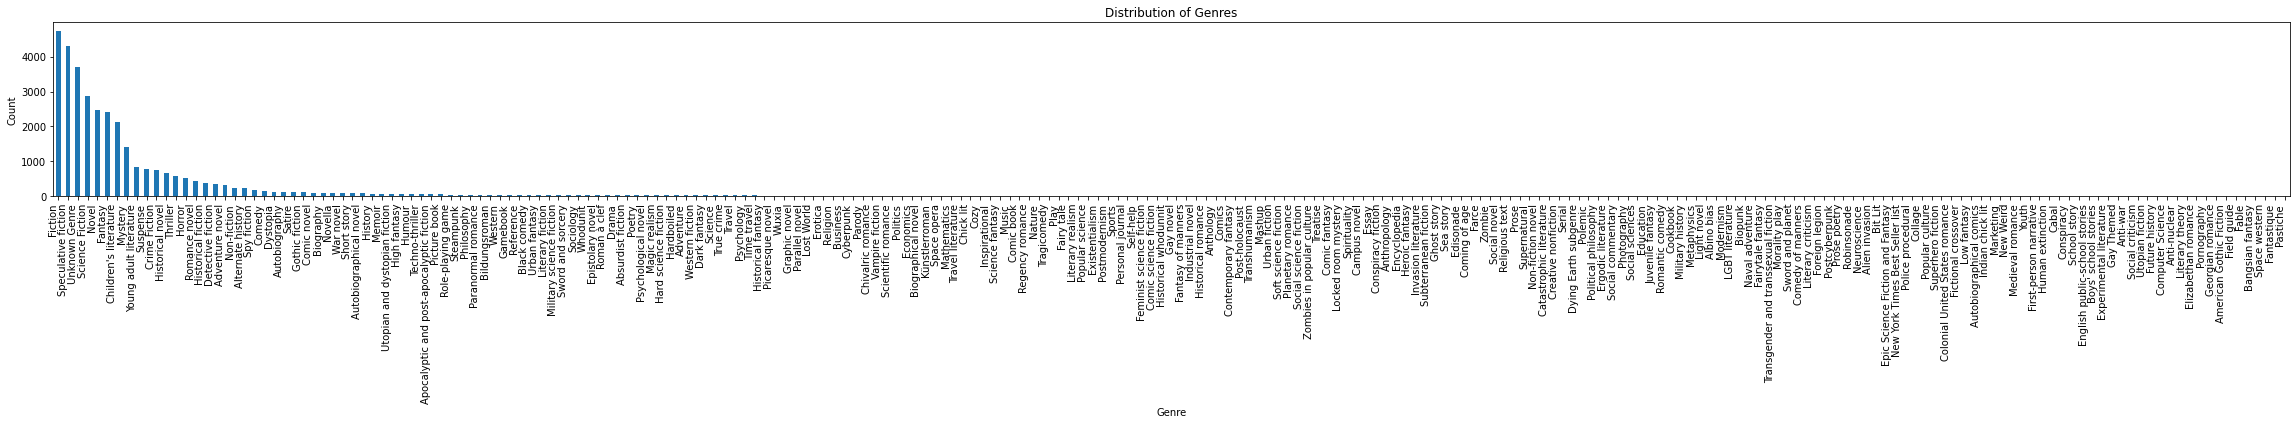

In [9]:
# Flatten the list of genres (since each entry is a list)
all_genres = [genre for sublist in df_cleaned['genre'] for genre in sublist]

# Count the occurrence of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plot the distribution of genres as a bar chart
plt.figure(figsize=(32, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


- bar chart (distribution of the 30 authors)

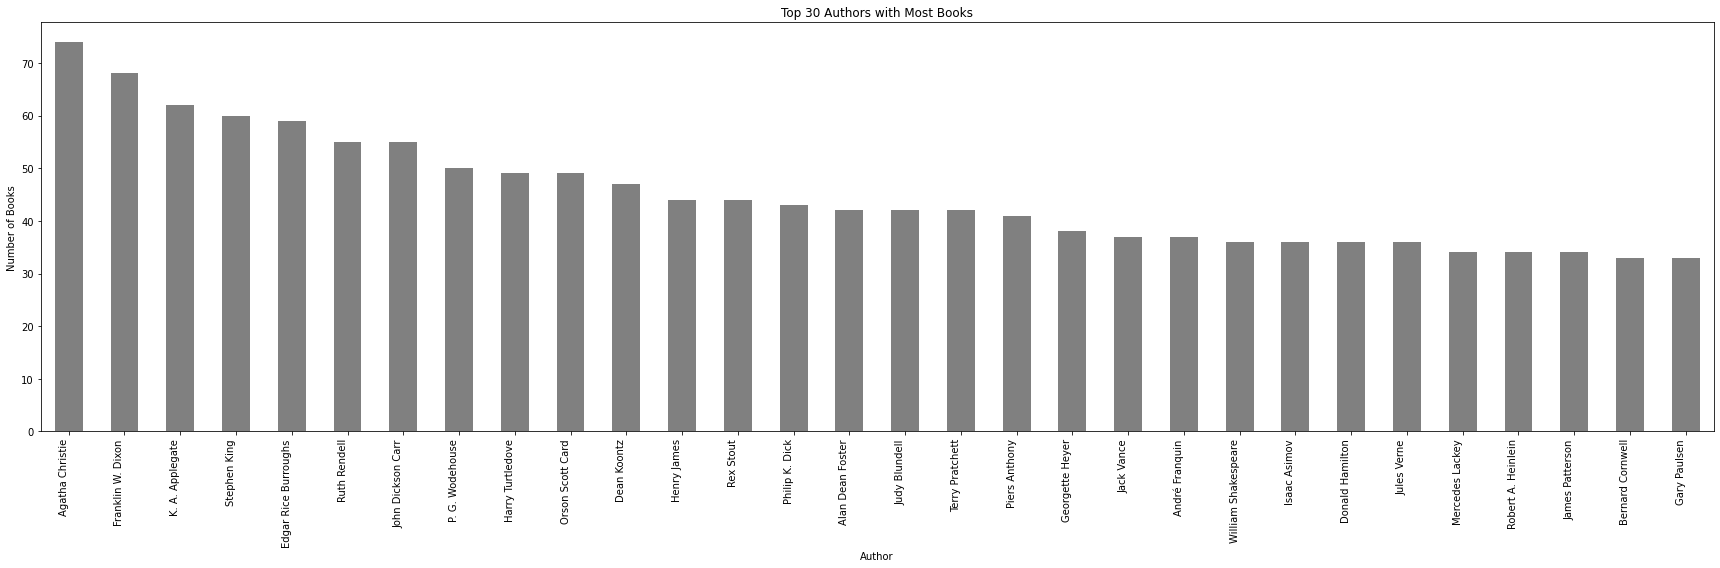

In [19]:
# Calculate the frequency of each author
author_counts = df_cleaned['author'].value_counts()

# Select the top 30 authors with the most books
top_30_authors = author_counts.drop('Unknown Author').head(30)

# Plot the frequency of top 10 authors as a bar chart
plt.figure(figsize=(24, 8))  # Set the size of the plot
top_30_authors.plot(kind='bar',  color='gray')
plt.title('Top 30 Authors with Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


- histogram (Distribution of Summary Lengths)

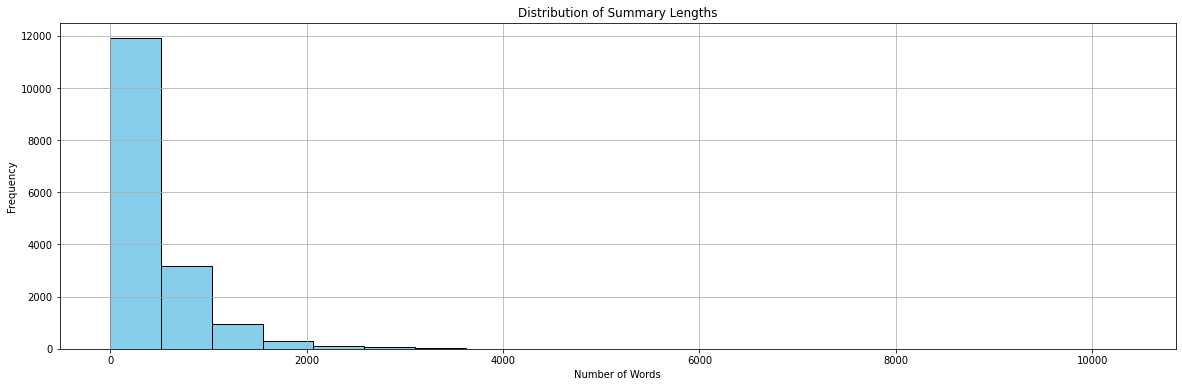

In [75]:

# Calculate the length of each summary (number of words)
summary_lengths = df_cleaned['summary'].str.split().apply(len)

# Plot the distribution of summary lengths as a histogram
plt.figure(figsize=(20, 6))
plt.hist(summary_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Summary Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True) 
plt.show()


- bar chart (Distribution of 50 Most Frequent Published Years)

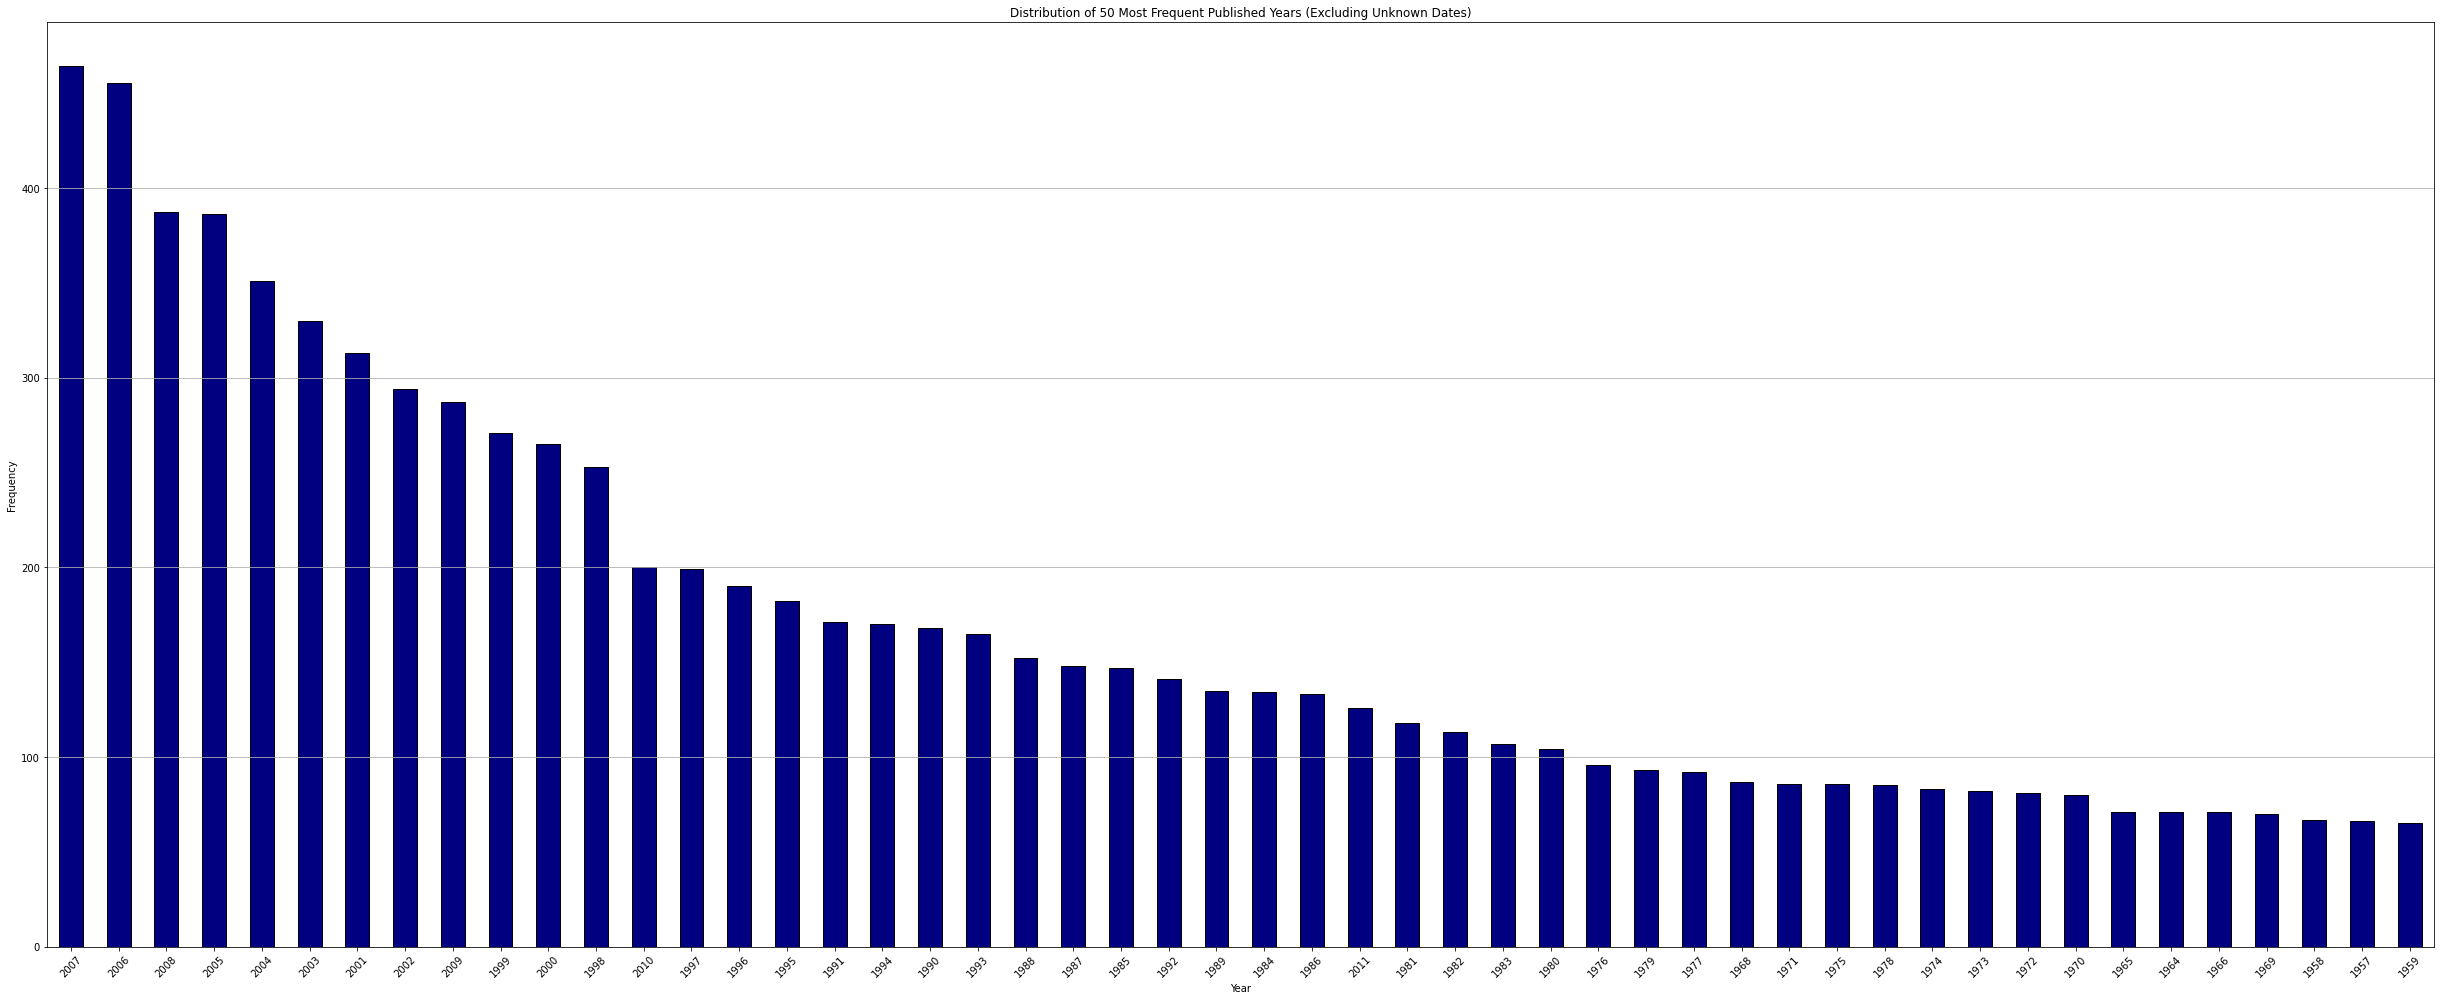

In [175]:
# Filter out rows with unknown dates
df_cleaned['published_year'] = df_cleaned['published_date'].str[:4]
df_filtered = df_cleaned[df_cleaned['published_year'] != 'Unkn']

# Calculate the frequency of each year
year_counts = df_filtered['published_year'].value_counts().head(50)

# Plot the distribution of the 30 most frequent published years as a bar chart
plt.figure(figsize=(34, 14))
year_counts.plot(kind='bar', color='navy', edgecolor='black')
plt.title('Distribution of 50 Most Frequent Published Years (Excluding Unknown Dates)')
plt.xlabel('Year')
plt.ylabel('Frequency') 
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout() 
plt.show()


- word clouds

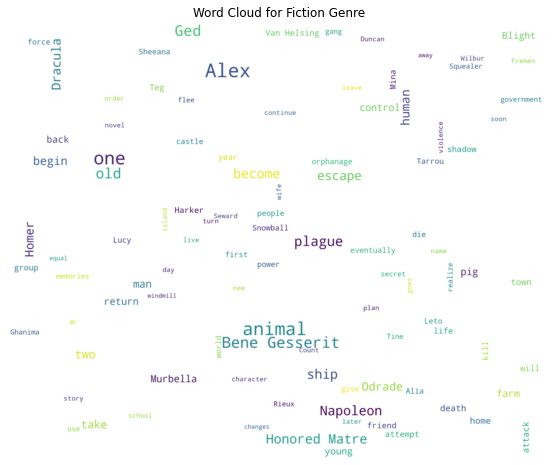

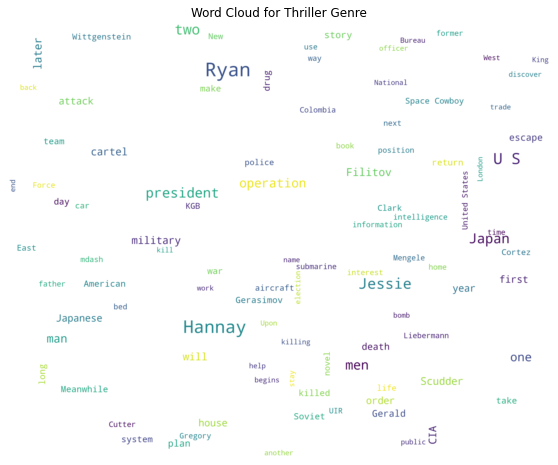

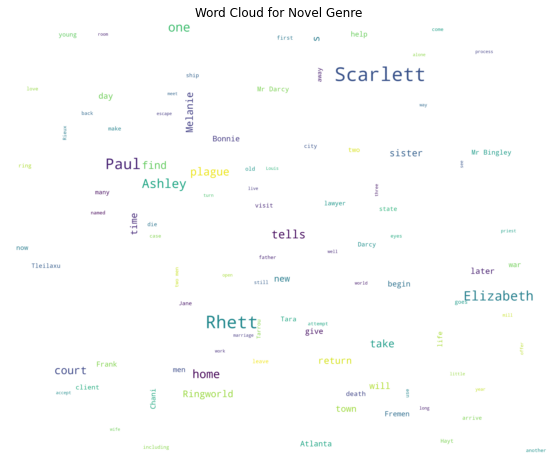

In [82]:
from wordcloud import WordCloud, STOPWORDS
# Define stopwords
stopwords = set(STOPWORDS)

# Function to generate word cloud for a specific genre
def generate_word_cloud(genre):
    # Filter DataFrame for the specified genre and non-NaN values
    # Initialize an empty list to store rows
    new_rows = []
    # Iterate over the original DataFrame
    for index, row in df_cleaned.iterrows():
        # Check if 'Fiction' is in the genre column
        if genre in row['genre']:
            new_rows.append({'summary': row['summary'], 'Genres': row['genre']})

    # Create a new DataFrame from the list of rows
    new_df = pd.DataFrame(new_rows)

    # Join summary text for the genre
    text = ' '.join(new_df['summary'][0:10])

    # Generate word cloud
    wordcloud = WordCloud(width=1000,
                          height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=35,
                          scale=3,
                          random_state=1).generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre', fontsize=12)
    plt.axis('off')
    plt.show()

# Generate word cloud for 'Fiction' genre
generate_word_cloud('Fiction')

# Generate word cloud for 'Science Fiction' genre
generate_word_cloud('Thriller')

# Generate word cloud for 'Novel' genre
generate_word_cloud('Novel')


- Exploring text complexity (Flesch Reading Ease (FRE) score)

In [10]:
from textstat import flesch_reading_ease, automated_readability_index 

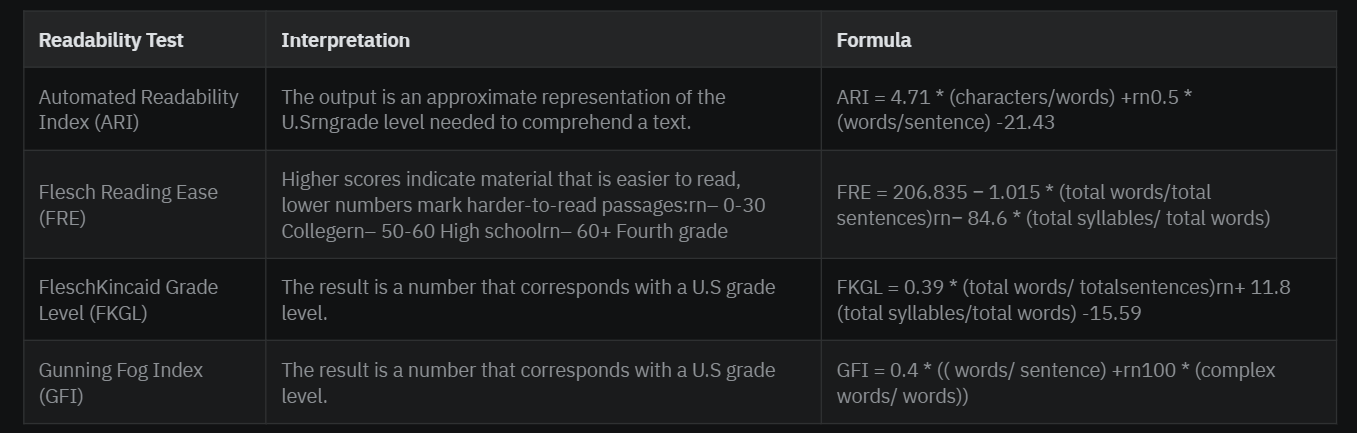
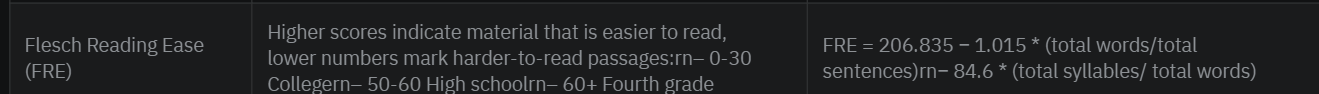

<AxesSubplot:>

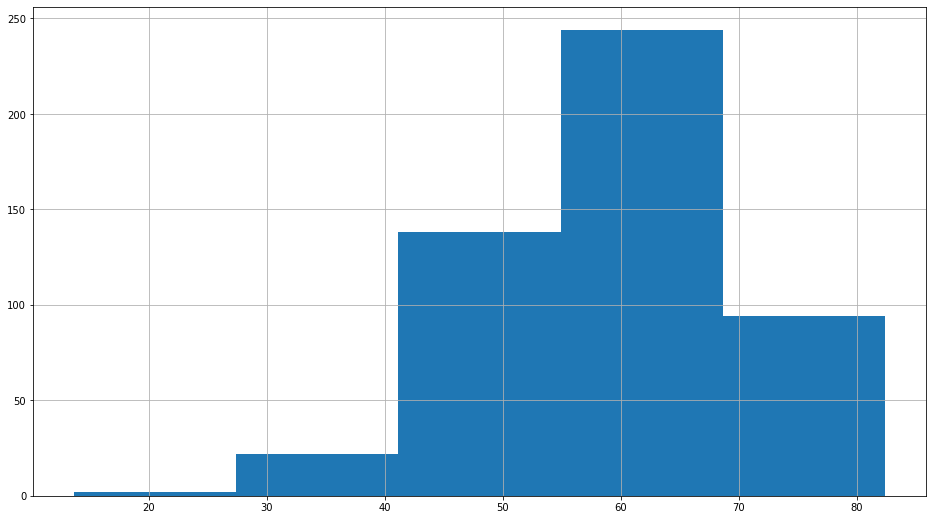

In [34]:
# apply FRE score to 500 samples
df_cleaned_subset = df_cleaned[0:500] 
df_cleaned_subset['summary'].apply(lambda x: flesch_reading_ease(x)).hist(bins=5,figsize=(16, 9))  

In [ ]:
# save the finall dataframe 
df_cleaned.to_csv('dataset_cleaned.csv', index=False)   